0. Open
1. Review
2. Topic

    2.1 벡터와 행렬
    
    2.2 Perceptron
    
    2.3 Deep Learning
    
3. Q&A
4. Next
5. Close

## Softmax Regression - 다중 클래스 분류

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv('iris.csv', encoding='latin1')

In [4]:
print(len(data))

150


In [5]:
print( data[ :5 ] )

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
print( '품종 종류 : ', data[ 'species' ].unique(), sep = '\n' )

품종 종류 : 
['setosa' 'versicolor' 'virginica']


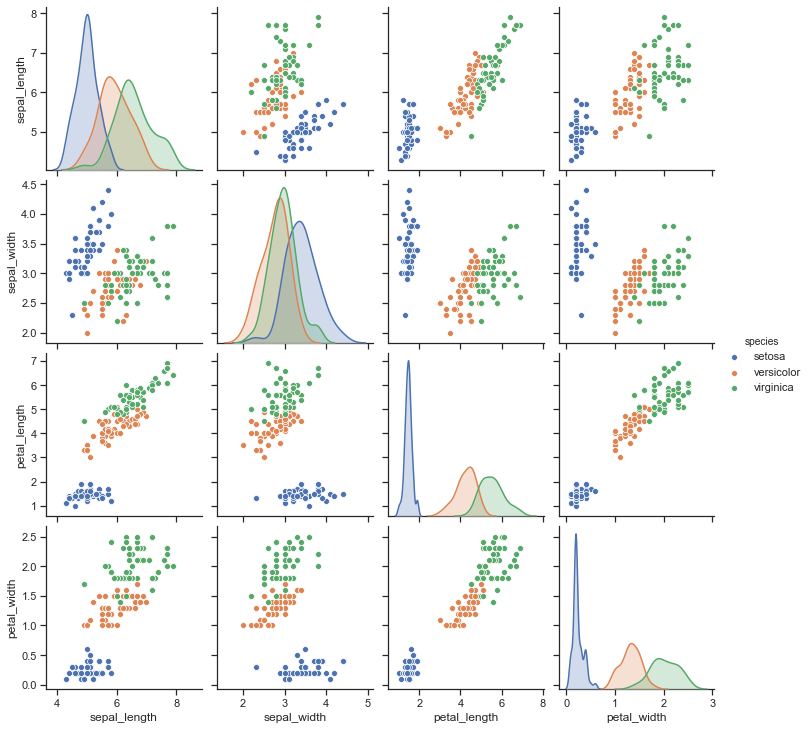

In [7]:
sns.set( style = 'ticks', color_codes = True )
g = sns.pairplot( data, hue = 'species' )

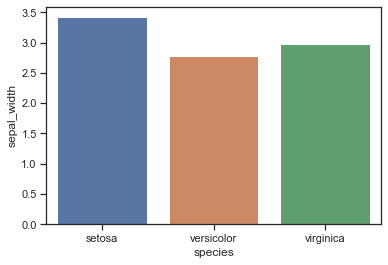

In [8]:
sns.barplot( data[ 'species' ], data[ 'sepal_width' ], ci = None )

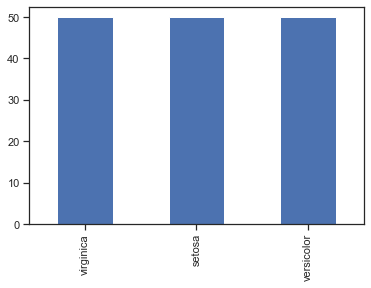

In [9]:
data[ 'species' ].value_counts().plot( kind = 'bar' )

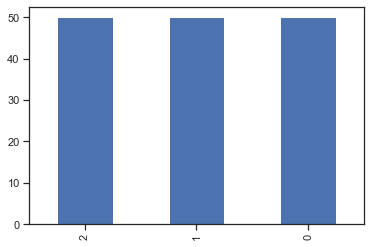

In [10]:
data[ 'species' ] = data[ 'species' ].replace( [ 'setosa', 'versicolor', 'virginica' ], [ 0, 1, 2 ] )

# setosa는 0, versicolor는 1, virginica는 2, 됨.
data[ 'species' ].value_counts().plot( kind = 'bar' )

In [11]:
data_X = data[ [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ] ].values
data_y = data[ 'species' ]

In [12]:
print( data_X[ :5 ] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print( data_y[ :5 ] )

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
( X_train, X_test, y_train, y_test ) = train_test_split( data_X, data_y, 
                                                         train_size = 0.8, random_state = 1 )

In [16]:
# 품종에 대한 One-hot encoding
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )

In [17]:
print( y_train[ :5 ] )

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [18]:
print( y_test[ :5 ] )

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [19]:
model = Sequential()
model.add( Dense( 3, input_dim = 4, activation = 'softmax' ) )
sgd = optimizers.SGD( lr = 0.01 )

In [20]:
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [ 'accuracy' ] )
history = model.fit( X_train, y_train, batch_size = 1, epochs = 200, 
                     validation_data = ( X_test, y_test ) )

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 2s 14ms/sample - loss: 2.3449 - accuracy: 0.3167 - val_loss: 2.1758 - val_accuracy: 0.4000
Epoch 2/200
120/120 [==============================] - 1s 5ms/sample - loss: 1.6911 - accuracy: 0.3500 - val_loss: 1.7934 - val_accuracy: 0.2667
Epoch 3/200
120/120 [==============================] - 1s 5ms/sample - loss: 1.3740 - accuracy: 0.4333 - val_loss: 1.5140 - val_accuracy: 0.2000
Epoch 4/200
120/120 [==============================] - 1s 5ms/sample - loss: 1.1774 - accuracy: 0.4000 - val_loss: 1.3488 - val_accuracy: 0.2000
Epoch 5/200
120/120 [==============================] - 1s 5ms/sample - loss: 1.0708 - accuracy: 0.3750 - val_loss: 1.2339 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 4ms/sample - loss: 0.9999 - accuracy: 0.3750 - val_loss: 1.1433 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 3ms/sample - loss: 0.9416 

Epoch 57/200
120/120 [==============================] - 1s 4ms/sample - loss: 0.3635 - accuracy: 0.9333 - val_loss: 0.4398 - val_accuracy: 0.7333
Epoch 58/200
120/120 [==============================] - 1s 4ms/sample - loss: 0.3643 - accuracy: 0.9250 - val_loss: 0.4379 - val_accuracy: 0.7333
Epoch 59/200
120/120 [==============================] - 0s 3ms/sample - loss: 0.3565 - accuracy: 0.9083 - val_loss: 0.4191 - val_accuracy: 0.7667
Epoch 60/200
120/120 [==============================] - 0s 3ms/sample - loss: 0.3532 - accuracy: 0.9500 - val_loss: 0.4194 - val_accuracy: 0.7000
Epoch 61/200
120/120 [==============================] - 1s 4ms/sample - loss: 0.3511 - accuracy: 0.9250 - val_loss: 0.4081 - val_accuracy: 0.8333
Epoch 62/200
120/120 [==============================] - 0s 4ms/sample - loss: 0.3484 - accuracy: 0.9417 - val_loss: 0.4278 - val_accuracy: 0.7333
Epoch 63/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.3433 - accuracy: 0.9250 - val_loss: 0.4073 -

120/120 [==============================] - 0s 4ms/sample - loss: 0.2436 - accuracy: 0.9667 - val_loss: 0.2984 - val_accuracy: 0.9333
Epoch 114/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2395 - accuracy: 0.9667 - val_loss: 0.3039 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2378 - accuracy: 0.9667 - val_loss: 0.2892 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2358 - accuracy: 0.9667 - val_loss: 0.2851 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2346 - accuracy: 0.9833 - val_loss: 0.2940 - val_accuracy: 0.9333
Epoch 118/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2325 - accuracy: 0.9833 - val_loss: 0.2998 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.2309 - accuracy: 0.9667 - val_loss: 0.2887 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 3ms/sample - loss: 0.1782 - accuracy: 0.9750 - val_loss: 0.2342 - val_accuracy: 0.9333
Epoch 170/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1779 - accuracy: 0.9833 - val_loss: 0.2412 - val_accuracy: 0.9333
Epoch 171/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1783 - accuracy: 0.9750 - val_loss: 0.2325 - val_accuracy: 0.9333
Epoch 172/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1762 - accuracy: 0.9750 - val_loss: 0.2310 - val_accuracy: 0.9333
Epoch 173/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1757 - accuracy: 0.9750 - val_loss: 0.2277 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1760 - accuracy: 0.9750 - val_loss: 0.2241 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 1s 5ms/sample - loss: 0.1729 - accuracy: 0.9833 - val_loss: 0

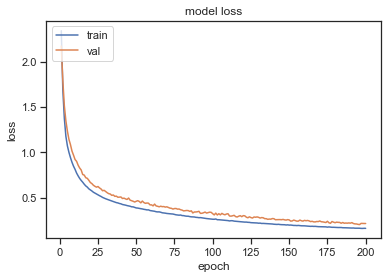

In [21]:
epochs = range( 1, len( history.history[ 'accuracy' ] ) + 1 )
plt.plot( epochs, history.history[ 'loss' ] )
plt.plot( epochs, history.history[ 'val_loss' ] )
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend( [ 'train', 'val' ], loc = 'upper left' )
plt.show()

In [22]:
print( "\n테스트 정확도 : %.4f" % ( model.evaluate( X_test, y_test )[ 1 ] ) )

30/30 [==============================] - 0s 13ms/sample - loss: 0.2132 - accuracy: 0.9667

테스트 정확도 : 0.9667


# 벡터와 행렬 연산
## 벡터와 행렬과 텐서
- 벡터는 크기와 방향을 가진 양, 숫자가 나열된 형상이며 1차원배열 표현
- 행렬은 행과 열을 가진 2차원 형상, 2차원 배열 표현
- 3차원부터는 텐서라 부르고, 3차원 배열로 표현

## 텐서(Tensor)
- 인공 신경망은 복작한 모델 내의 연산을 주로 행렬 연산을 통해 해결
- 행렬 연산은 2차원 배열을 통한 행렬 연산을 의미
- 머신/딥 러닝의 입/출력이 복잡해지면 3차원 텐서에 대한 이해 필요

In [23]:
import numpy as np

### 0차원 텐서(0D Tensor)

- 스칼라 : 하나의 값

In [25]:
s = np.array(5)
print(s.ndim) # 축의 개수
print(s.shape)

0
()


### 1차원 텐서(1D Tensor)
- 숫자를 특정 순서대로 배열한 것, 벡터라고 하며 벡터는 1차원 텐서
- 벡터의 차원은 하나의 축의 차원들이 존재하는 것
- 텐서의 차원은 축의 개수를 의미

In [26]:
v = np.array([1, 2, 3, 4])

print(v.ndim)
print(v.shape)

1
(4,)


### 2차원 텐서(2D Tensor)
- 행과 열이 존재하는 벡터의 배열, 행렬(matrix)를 2차원 텐서라 한다.
- 1차원 텐서는 벡터(vector), 2차원 텐서는 행렬(matrix)

In [28]:
m = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print(m.ndim)
print(m.shape)

2
(3, 4)


### 3차원 텐서(3D Tensor)
- 행렬 또는 2차원 텐서를 단위로 한 번 더 배열하면 3차원 텐서라 한다.
- 복잡한 인공 신경망의 입/출력값을 이해하는데 3차원 텐서를 이용한다.

In [29]:
d = np.array([
                [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                [[11, 12, 13, 14], [15, 16, 17, 18], [19, 20, 21, 22]]
])
print(d.ndim)
print(d.shape)

3
(2, 3, 4)


- 3D 텐서는 시퀀스 데이터(Sequence Data)로 표현
- 시퀀스 데이터는 문장, 문서, 뉴스 기사, 리뷰
- 3D 텐서는 (samples, timesteps, word_dim) : samples - 데이터 개수, timesteps - 시퀀스 길이, word_dim : 단어
- 일괄로 처리하기 위한 데이터 묶음 단위를 배치(batch_size, timesteps, word_dim) : batch_size - 데이터 개수

## 벡터/행렬 연산

### 벡터/행렬 덧셈, 뺄셈
- 같은 크기의 두 개의 벡터와 행렬은 덧셈과 뺄셈을 할 수 있다. 이 때 같은 위치의 원소끼리 연산한다.

In [30]:
a = np.array([8, 4, 5])
b = np.array([1, 2, 3])

print(a + b)
print()
print(a - b)

[9 6 8]

[7 2 2]


In [31]:
a = np.array([[10, 20, 30], [40, 50, 60]])
b = np.array([[5, 6, 7], [8, 9, 10]])

print(a + b)
print()
print(a - b)

[[15 26 37]
 [48 59 70]]

[[ 5 14 23]
 [32 41 50]]


### 벡터의 내적
- 겹곱(dot product), 내적(Inner product)
- 점으로 표현
- 내적이 성립하기 위해서는 두 벡터의 차원이 같아야하며, 두 벡터 중 앞의 벡터는 행벡터(가로 방향 벡터)이고 뒤의 벡터는 열벡터(세로 방향 벡터)여야 한다.
- 벡터 내적의 결과는 스칼라이다.

In [32]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.dot(a, b))

32


### 행렬 곱셈
- 행렬 곱셈은 벡터의 내적 이해
- 행렬 곱셈은 왼쪽 행렬의 행벡터(가로 방향 벡터)와 오른쪽 행렬의 열벡터(세로 방향 벡터)의 내적(대응하는 원소들의 곱)

In [33]:
a = np.array([[1, 3], [2, 4]])
b = np.array([[5, 7], [6, 8]])

print(np.matmul(a, b))

[[23 31]
 [34 46]]


행렬 곱은 두 가지 정의를 가진다. 두 개의 행렬 K와 K의 곱은
    1. 두 행렬의 곱 J * K에 대하여 행렬 J의 열의 수와 행렬 K의 행의 수는 같아야한다.
    2. 두 행렬의 곱 J * K의 결과로 나온 행렬 JK의 크기는 J의 행의 크기와 K의 열의 크기를 가진다.

- 전체 데이터들 중 1개씩 불러와서 처리하고자 한다면 m은 1이 된다.
- 전체 데이터를 임의의 m개씩 묶인 작은 그룹들로 분할하여 여러번 처리할 수도 있는데 이렇게 처리하면서 기계가 학습하는 것을 미니배치 학습이라 한다.
- 예로 1024개 데이터 중 m을 64로 잡는다면 전체 데이터는 16개 그룹으로 분할된다.
- 각 그룹은 총 64개의 샘플로 구성되며 행렬 연산은 16번 반복하여 전체 데이터에 대한 학습이 완료된다.
- 이 때 64를 배치 크기(batch size)라 한다.

## 퍼셉트론(Perceptron)
- 프랑스 로젠블라트(Frank Rosenblatt)가 1947년에 제안한 초기 형태 인공신경망 알고리즘
- 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘

- x : 입력값
- W : 가중치(Weight), 축각돌기 역할
- y: 출력값(neuron)

- 각각의 인공 뉴런에서 보내진 입력값 x는 각각의 가중치 W와 함께 종착지인 인공 뉴런 y에 전달
- 각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당하는 가중치의 곱이 전체 합이 임계치(threshold)를 넘으면 종착지에서 출력 신호로서 1이나 0이 출력되는 구조

- W(가중치)값이 클수록 중요하다는 것을 의미
- 출력 : 결과를 결정하는 함수 - 활성화 함수(Activation Function)


- 퍼셉트론 종류
    - 단층 퍼셉트론 (Single-Layer Perceptron) 
    - 다층 퍼셉트론 (Mulit-Layer Perceptron)

## 단층 퍼셉트론(Single-Layer Perceptron)

- 값을 보내는 단계하고 값을 받아서 출력하는 단계로 구성

- x1, x2 : 입력값
- y : 출력값
- W1, W2 : 가중치, 임의 결정
- b : bias, 임의 결정

In [34]:
# 단층 퍼셉트론을 이용한 AND gate
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1 * w1 + x2 * w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [35]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [36]:
# 단층 퍼셉트론을 이용한 NAND gate
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1 * w1 + x2 * w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [37]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [38]:
# 단층 퍼셉트론을 이용한 OR gate
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1 * w1 + x2 * w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1

In [39]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

## 다층 퍼셉트론(Muliti-Layer Perceptron, MLP)

- 단층 퍼셉트론은 입력층과 출력층으로만 구성, 다층 퍼셉트론은 중간에 층을 더 추가하여 표현한다.
- 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 한다.
- XOR 게이트는 AND, OR, NAND를 조합하여 만들 수 있다.

In [50]:
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    
    return y

In [51]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

- 심층 신경망(Deep Neural Network, DNN) : 은닉층이 2개 이상인 신경망

- W(가중치)와 b(bias)를 수동이 아닌 기계를 통한 자동 결정을 학습(training)이라고 함
- 학습 과정에서 손실 함수와 옵티마이저를 사용하여 최적의 W, b값 결정
- 학습을 시키는 인공 신경망이 심층 신경망일 때 딥러닝이라고 함

## 인공 신경망(Artificial Neural Network)

### 1. 피드 포워드 신경망(Feed-Foward Neural Network, FFNN)

- 다층 퍼셉트론(MLP)와 같이 입력층에서 출력층 방향으로 연산이 전개되는 신경망

## 전결합층(Fully-connected layer, FC, Dense Layer)

- 다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런이 바로 이전 층의 모든 뉴런과 연결되어 있다.
- 이와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 층을 전결합층이라 한다.
- 다층 퍼셉트론이 전결합층, 밀집층(Dense Layer)

## 활성화 함수(Activation Function)

- 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation Function)라 한다.
- 활성화 함수 종류 : 계단 함수, 시그모이드 함수, 소프트맥스 함수, ReLU 함수

### 활성화 함수 특징

- 활성화 함수는 비선형 함수이어야 한다.
- 선형 함수 : y = Wx + b
- 선형 함수를 사용하는 경우 선형층(Linear layer)
- 비선형 함수를 사용하는 경우 비선형층(Nonlinear layer) -> 주로 사용


In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

### 계단 함수(Step Function)
- 이제 거의 사용되지 않지만, 퍼셉트론을 통한 인공 신경망을 이행할 때 처음 접하는 활성화 함수

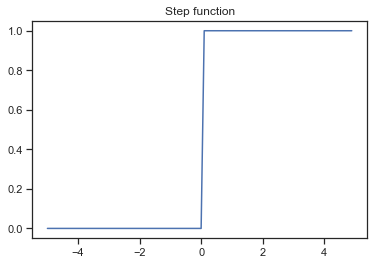

In [53]:
def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

plt.title('Step function')
plt.plot(x, y)
plt.show()

### 시그모이드 함수(sigmoid function)

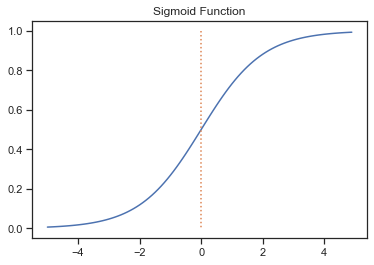

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

- 신경망 학습 과정
    - 인공 신경망은 입력에 대하여 순전파(Foward Propagation) 연산을 수행한다.
    - 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(Loss Function)을 통해 계산한다.
    - 손실(loss)을 미분을 통해서 기울기(gradient)를 구한다.
    - 이를 통해 역전파(Back Propagation)을 수행한다.

- 시그모이드 함수는 미분을 해서 기울기를구할 때 문제가 생긴다.
- 시그모이드 함수의 출력값은 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 갖는다.
- 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단으로 기울기가 잘 전달되지 않는다.
- 시그모이드 함수는 은닉층에서 사용하는 것을 지양한다.

### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
- 입력값을 -1과 1 사이의 값으로 변환하는 활성화 함수

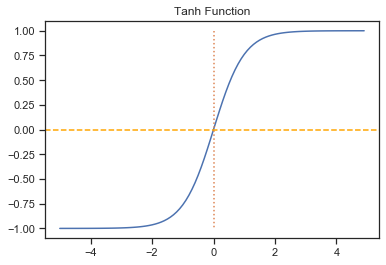

In [55]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ":")
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### ReLU 함수

- f(x) = max(0, x)
- 렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다.
- 단점은 입력값이 음수면 기울기가 0이 되는데 이 뉴런은 다시 회생하는 것이 불가능하다.
- 이 문제를 dying ReLU라 한다.

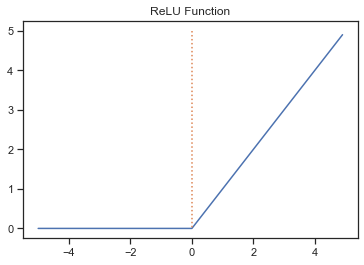

In [56]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ":")
plt.title('ReLU Function')
plt.show()

### Leaky ReLU Function
- 죽은 ReLU 함수를 보완하기 위해 ReLU를 변형한 함수
- Leaky ReLU는 입력값이 음수일 경우 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있다.
- Leaky ReLU : f(x) = max(ax, x) -> a는 하이퍼파라미터로 Leaky(새는)한 정도를 결정하며 일반적으로 0.01을 값으로 가진다.

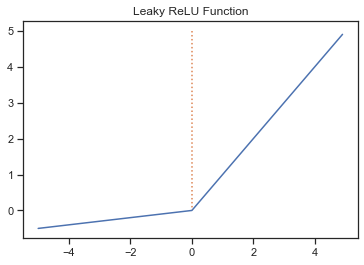

In [58]:
def leaky_relu(x, a):
    return np.maximum(a * x, x)

a = 0.1
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x, a)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ":")
plt.title('Leaky ReLU Function')
plt.show()

### 소프트맥스 함수(Softmax function)

- 은닉층에는 ReLU함수(변형 ReLU 함수 - Leaky ReLU)를 많이 사용
- 출력층에는 시그모이드 함수나 소프트맥스 함수 사용
- 분류 문제 적용 시
    * 이진 클래스 분류 : 시그모이드 함수
    * 다중 클래스 분류 : 소프트맥스 함수

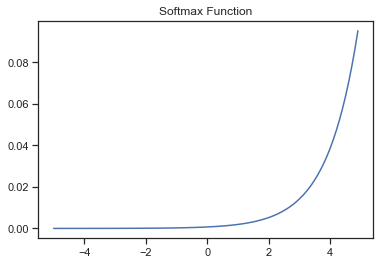

In [59]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))
plt.plot(x ,y)
plt.title('Softmax Function')
plt.show()